# Step 1. 
 - Have a quick look on the dataset, which is very much needed to build the thought process around the data
 - Reread problem statement multiple times and try to understand how to correlate the dataset and problem. 
 - Plot the visualization 
 
 Our problem statment: Look for the correlation of sensors which leads to device breakdown



1. Quick Checklist for this dataset
*     timeseries forecasting problem 
*     machine status - 3 convert that into label encoding 
*     all numerical values
*     anomlay detection 
*     labelled data - supervised learning , classification 
*     look for correlation matrix 
*     look for skewness in the data 
*     check imbalance angle if any 

In [ ]:
# load the dataset 
import pandas as pd
import numpy as np

df = pd.read_csv('../input/sensor.csv')
df.head(2)

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.31076,634.375,76.45975,13.41146,16.13136,...,41.92708,39.6412,65.68287,50.92593,38.19444,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.31076,634.375,76.45975,13.41146,16.13136,...,41.92708,39.6412,65.68287,50.92593,38.19444,157.9861,67.70834,243.0556,201.3889,NORMAL


In [ ]:
df.tail()

# 01-Apr-2018 to 31-Aug-2018 
# apr, may, jun, jul, aug - 5 months every min data is collected 

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
220315,220315,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,...,38.28125,68.28703,52.37268,48.32176,41.087960,212.3843,153.6458,NaN,231.1921,NORMAL
220316,220316,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,...,38.28125,66.84028,50.63657,48.03241,40.798610,213.8310,156.2500,NaN,231.1921,NORMAL
220317,220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,...,39.06250,65.39352,48.90046,48.03241,40.798610,217.3032,155.3819,NaN,232.0602,NORMAL
220318,220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,...,40.62500,64.23611,47.74306,48.32176,40.509258,222.5116,153.9352,NaN,234.0856,NORMAL
220319,220319,2018-08-31 23:59:00,2.396528,47.69965,50.520832,43.142361,639.814800,65.45634,15.11863,16.65220,...,41.40625,62.78935,46.29630,48.90046,40.219910,227.4306,150.4630,NaN,234.0856,NORMAL


In [ ]:
del df['Unnamed: 0']

In [ ]:
# convert time into index 
df['index'] = pd.to_datetime(df['timestamp'])
df.index = df['index']

In [ ]:
# delete the colunmns 
del df['index']
del df['timestamp']

In [ ]:
df.head(2)

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
index,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.31076,634.375,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.6412,65.68287,50.92593,38.19444,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.31076,634.375,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.6412,65.68287,50.92593,38.19444,157.9861,67.70834,243.0556,201.3889,NORMAL


In [ ]:
df['sensor_15'].nunique() # no unique - complete zero
# drop the column 
df.drop(['sensor_15'], axis=1, inplace = True)
df.shape

(220320, 52)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 220320 entries, 2018-04-01 00:00:00 to 2018-08-31 23:59:00
Data columns (total 52 columns):
sensor_00         210112 non-null float64
sensor_01         219951 non-null float64
sensor_02         220301 non-null float64
sensor_03         220301 non-null float64
sensor_04         220301 non-null float64
sensor_05         220301 non-null float64
sensor_06         215522 non-null float64
sensor_07         214869 non-null float64
sensor_08         215213 non-null float64
sensor_09         215725 non-null float64
sensor_10         220301 non-null float64
sensor_11         220301 non-null float64
sensor_12         220301 non-null float64
sensor_13         220301 non-null float64
sensor_14         220299 non-null float64
sensor_16         220289 non-null float64
sensor_17         220274 non-null float64
sensor_18         220274 non-null float64
sensor_19         220304 non-null float64
sensor_20         220304 non-null float64
sensor_21      

In [ ]:
# machine status - no null 
# we will drop na in whole dataframe 
df['sensor_00'].isna().sum()

10208

In [ ]:
# machine status
df['machine_status'].unique()#'NORMAL', 'BROKEN', 'RECOVERING' 
df['machine_status'].value_counts()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

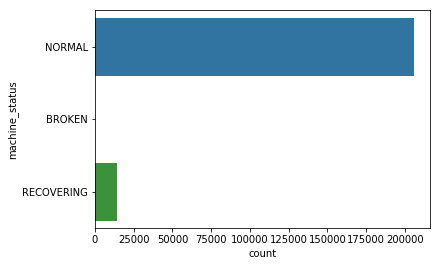

In [ ]:
# draw a countplot for machine status 
import seaborn as sns
sns.countplot(y = df['machine_status'])

** We are going to figureout what makes device to breakdown, 
* it is highly imbalanced data  and undersampling can't help here 
* we will experiement with SMOTE or oversampling 

In [ ]:
# apply label encoder to encode the machine status
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['machine_status'] = le.fit_transform(df['machine_status'])
df['machine_status'].value_counts()

# 1 - normal 
# 2 - recovering 
# 0 - broken

1    205836
2     14477
0         7
Name: machine_status, dtype: int64

In [ ]:
#  look on complete data frame when device is broken
df_broken = df[df.machine_status ==0]
df_broken

# there is no nan value corellation for broken device 
#

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
index,,,,,,,,,,,,,,,,,,,,,
2018-04-12 21:55:00,0.000000,53.342010,52.821180,43.402775,202.526031,49.79289,3.219039,16.890910,16.869210,15.082470,...,50.78125,50.92593,51.215280,50.636570,46.006940,409.143500,121.527800,401.909700,324.6528,0
2018-04-18 00:30:00,1.093982,42.534720,47.699650,41.449650,206.038757,60.30106,12.304690,15.154800,14.185470,13.867190,...,42.70833,34.72222,31.539350,34.432870,33.275460,59.895830,44.560180,177.662000,183.7384,0
2018-05-19 03:18:00,2.258796,47.265630,52.734370,43.446178,200.115738,66.14643,13.592300,15.914350,15.147570,14.793110,...,39.06250,35.01157,37.905090,39.062500,45.428240,144.675900,49.768520,246.238400,257.5231,0
2018-05-25 00:30:00,2.321759,47.482640,51.475693,42.795135,612.152800,67.30158,14.062500,16.608800,15.943290,15.596060,...,202.34370,65.68287,57.870370,127.893500,153.935200,155.381900,65.682870,220.196800,267.3611,0
2018-06-28 22:00:00,0.364005,40.190970,45.225690,40.190971,201.368622,0.00000,11.335360,15.270540,15.183740,15.118630,...,32.29166,28.06713,28.067129,29.513889,29.224537,29.224537,29.513889,32.407406,NaN,0
2018-07-08 00:11:00,0.001968,45.138890,52.907990,45.355900,500.000000,1.40131,0.028935,0.036169,0.036169,0.007234,...,36.19791,37.32639,35.300930,38.194440,43.402780,99.537030,44.849540,192.129600,174.7685,0
2018-07-25 14:00:00,2.318808,45.833332,52.994790,43.880210,420.503448,72.52040,14.185470,16.247110,15.697340,15.053530,...,51.30208,52.10200,52.662040,67.129630,43.981480,230.324100,69.733800,NaN,205.7292,0


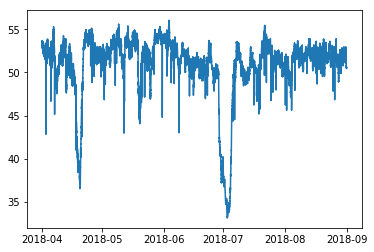

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(df['sensor_02'])

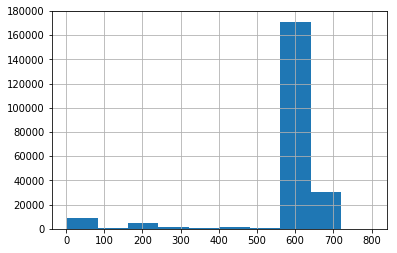

In [ ]:
# imputation for null values 
df['sensor_04'].hist()
# data is skewwed so we need to use median value to fill the data

In [ ]:
# let us figureout NaN values 
df['sensor_00'].isna().sum()

10208

In [ ]:
df['sensor_50'].isna().sum()

77017

In [ ]:
# used ffill method to fill the missing values
df = df.fillna(method='ffill')

In [ ]:
X = df.drop(['machine_status'], axis=1)
X.shape

(220320, 51)

In [ ]:
Y = df['machine_status']
Y.shape

(220320,)

In [ ]:
# apply the logitic regression 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.30, random_state = 42)

In [ ]:
# apply 
logit = LogisticRegression()
model = logit.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.30, random_state = 42)

logit = LogisticRegression()
model = logit.fit(X_train, y_train)


# predict
y_pred = model.predict(X_test)

# evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = pd.crosstab(y_test,y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
cm

In [ ]:
# predict
y_pred = model.predict(X_test)

In [ ]:
# evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = pd.crosstab(y_test,y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
cm

Predicted,1,2,All
True,,,
0,1,1,2
1,61698,106,61804
2,51,4239,4290
All,61750,4346,66096


In [ ]:
# accuracy is not a good metrics for Anomaly detection and imblaanced dataset
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9975944081336238

In [ ]:
# Classification Report
cr = classification_report(y_pred, y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00     61750
           2       0.99      0.98      0.98      4346

    accuracy                           1.00     66096
   macro avg       0.66      0.66      0.66     66096
weighted avg       1.00      1.00      1.00     66096



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# these reports are not good 
we will use Isolation forest and oneSVM for modelling 
xgboosting feature_importance and PCA for dimension reduction 
before that we will divide this dataset into 2 probelms
 machine status - normal + broken, normal + recovery, recovery+ broken 

In [ ]:
df.shape # look on the shape of the dataset

(220320, 52)

 machine status - normal + broken

In [ ]:
df1 = df.copy()
df1 = df[(df1.machine_status ==1) | (df1.machine_status ==0)]
df1.shape

(205843, 52)